### 19127216 - Đặng Hoàn Mỹ

In [1]:
import random
import itertools
import numpy as np
import seaborn as sns

1. Bốc ngẫu nhiên 10 viên bi trong hộp gồm 8 bi Đỏ và 12 bi Đen. Tính xác suất bốc được đúng 5 bi Đỏ trong các trường hợp
**(a) Bốc có hoàn lại.**

In [2]:
a = ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']

In [3]:
def boc(a):
    b = []
    for i in range(10):
        b.append(random.choice(a))
    return b

def check_boc(b):
    return b.count('R') == 5

def fre(a, N, event):
    m = sum(event(boc(a)) for _ in range(N))
    return m/N

fre(a, 10000, check_boc)

0.1949

**(b) Bốc không hoàn lại.**

In [4]:
def boc_2(a):
    b = []
    a_copy = a.copy()
    for i in range(10):
        choose = random.choice(a_copy)
        b.append(choose)
        a_copy.remove(choose)
    return b

def fre_2(a, N, event):
    m = sum(event(boc_2(a)) for _ in range(N))
    return m/N

fre_2(a, 10000, check_boc)

0.2434

2. Bỏ ngẫu nhiên 2 lá bài trong bộ bài 52 lá. Chia đều ngẫu nhiên 50 lá còn lại cho 5 người.
**Tính xác suất có người nào đó nhận được 4 lá Ách.**

In [5]:
vals = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'jack', 'queen', 'king', 'ace']
suits = ['spades', 'clubs', 'hearts', 'diamonds']

deck = list(itertools.product(vals, suits))
# len(deck)

In [6]:
def boc_3(deck):
    deck_copy = deck.copy()
    c_1 = random.choice(deck_copy)
    deck_copy.remove(c_1)
    c_2 = random.choice(deck_copy)
    deck_copy.remove(c_2)
    b = []
    
#     print(len(deck_copy))
    for i in range(5):
        c = []
        for j in range(10):
            choose = random.choice(deck_copy)
            c.append(choose)
            deck_copy.remove(choose)
        b.append(c)
    return b

def check_boc_3(b):
    aces = []
    for per in b:
        aces.append([card for card in per if 'ace' in card])
            
#     print(aces)
    check = False
    for i in aces:
        if len(i) == 4:
#             print(aces)
            check = True
            break
    return check

def fre_3(a, N, event):
    m = sum(event(boc_3(a)) for _ in range(N))
    return m/N

fre_3(deck, 10000, check_boc_3)

0.0042

3. Chọn ngẫu nhiên một số thực R trong khoảng $[0, 1]$ và dựng hình tròn có bán kính R.
**(a) Tính kì vọng của diện tích hình tròn.**

In [7]:
def generate_R(n):
    return (np.random.uniform(0, 1, n) ** 2) * np.pi

R_s = generate_R(10000)
print('Mean: ', np.mean(R_s))

Mean:  1.0550787747914447


**(b) Tìm phân phối của diện tích hình tròn.**

C:\Users\ryedh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

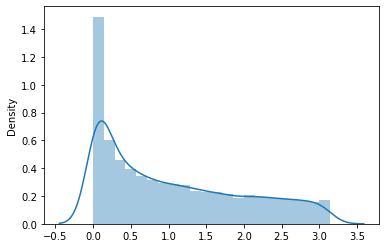

In [8]:
sns.distplot(R_s)